# Introduction/Business Problem
In the hope that the Covid-19 Pandemic is nearing an end, cities will need to start building local businesses back up invite new travelers in the hopes to reivigorate the economy. Boise, Idaho, is a popular destination not only for tourists and is rapidly growing in size.

With the help of Foursquare, the aim of the project is to highlight Boise metropolitan neighborhoods as potential areas for tourists to soak in a unique Boise experience.



# Data
The data used for this study will be:

1.Dataset of Boise neighborhoods from City of Boise, which has been prepared as a CSV file and imported.

https://opendata.cityofboise.org/datasets/9751fb5ec88b47918ec3c0c866609f6d_0/data

2.Boise Venue data through Foursquare. The Venue data will be used to segment Boise into clusters to be used for tour groups and city tourism. 


# Methodology
The first step is to use pandas to get the Boise dataset from City of Boise.

In [1]:
# import environment
!pip install lxml

import pandas as pd
import requests
import numpy as np

In [34]:
#set variable
Boise_data = "https://raw.githubusercontent.com/ihippeard/Coursera_Capstone/master/Neighborhood_Associations.csv"

In [35]:
#using csv file of Boise Neighborhoods
df_BC = pd.read_csv(Boise_data)
df_BC.head()

,FID,OBJECTID,ASSOCIATIO,ASSOCIAT_1,Weblink,Shape__Are,Shape__Len,ORIG_FID,Lat,Lon
0,0,98108,Northwest,1,northwest-neighborhood-association,7.869740e+06,13178.189596,0,43.682499,-116.295998
1,1,98109,Sunset,11,sunset-neighborhood-association,2.913832e+06,8247.884246,1,43.643799,-116.227997
2,2,98110,North End,6,north-end-neighborhood-association,8.526393e+06,15092.569609,2,43.632000,-116.209000
3,3,98111,West Downtown,5,west-downtown-neighborhood,5.035376e+05,3018.321296,3,43.621899,-116.214996
4,4,98112,Downtown Boise,8,downtown-boise-neighborhood-association,7.355536e+06,15938.253324,4,43.613499,-116.209999


Cleaning the Data

In [37]:
#drop unneded columns
df_BC=df_BC.drop(columns= ["FID","OBJECTID","ASSOCIAT_1","Weblink", "Shape__Are", "Shape__Len", "ORIG_FID"])

#rename columns
df_BC=df_BC.rename(columns={"Lon": "Longitude", "Lat": "Latitude", "ASSOCIATIO": "Neighborhood"})
df_BC.head()

,Neighborhood,Latitude,Longitude
0,Northwest,43.682499,-116.295998
1,Sunset,43.643799,-116.227997
2,North End,43.632000,-116.209000
3,West Downtown,43.621899,-116.214996
4,Downtown Boise,43.613499,-116.209999


Explore and Cluster Boise Data

In [38]:
#import libraries
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

import seaborn as sns

# import k-means from clustering stage
from sklearn.cluster import KMeans

# convert an address into latitude and longitude values
!pip install geopy
from geopy.geocoders import Nominatim

# map rendering library
!pip install folium
import folium

     |████████████████████████████████| 93 kB 2.4 MB/s  eta 0:00:01


Prepare Map of Boise

In [39]:
#create map layer using lat, long values
address = 'Boise ID'
geolocator = Nominatim(user_agent="BC_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Boise, ID, is {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Boise, ID, is 43.6166163, -116.200886.


In [41]:
map_BC = folium.Map(location=[latitude, longitude], zoom_start=12)

for lat, lng, neighborhood in zip(df_BC['Latitude'], df_BC['Longitude'], df_BC['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_BC)

map_BC

Use the Foursquare API to explore and segment the neighborhoods

In [42]:
#define Foursquare API cridentials
CLIENT_ID = '0PA55QNUKZFYWSOLJLHQKNCK3COEGFSS1R52W2H1MV2U4IN0' # your Foursquare ID
CLIENT_SECRET = 'X0UACIXZYLLRWKCNZFR0F01CKV3ZPDVNZ2HDVYQUZTUINATV' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value
radius = 500 # define radius
API_URL = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)
API_URL

Your credentails:
CLIENT_ID: 0PA55QNUKZFYWSOLJLHQKNCK3COEGFSS1R52W2H1MV2U4IN0
CLIENT_SECRET:X0UACIXZYLLRWKCNZFR0F01CKV3ZPDVNZ2HDVYQUZTUINATV


'https://api.foursquare.com/v2/venues/explore?client_id=0PA55QNUKZFYWSOLJLHQKNCK3COEGFSS1R52W2H1MV2U4IN0&client_secret=X0UACIXZYLLRWKCNZFR0F01CKV3ZPDVNZ2HDVYQUZTUINATV&ll=43.6166163,-116.200886&v=20180605&radius=500&limit=100'

In [43]:
results = requests.get(API_URL).json()
results

{'meta': {'code': 200, 'requestId': '5fdf77d267c4b00207527b9f'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': '$-$$$$', 'key': 'price'},
    {'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Downtown Boise City',
  'headerFullLocation': 'Downtown Boise City, Boise',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 57,
  'suggestedBounds': {'ne': {'lat': 43.6211163045, 'lng': -116.194681887824},
   'sw': {'lat': 43.612116295499995, 'lng': -116.20709011217599}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4bad27aaf964a5207e333be3',
       'name': 'Bittercreek Ale House',
       'location': {'address': '246 N 8th St',
        'crossStreet': 'at W. Idaho St.',
        'lat': 43.61661248396162,
        '

In [44]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [45]:
venues = results['response']['groups'][0]['items']  
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  from ipykernel import kernelapp as app


,name,categories,lat,lng
0,Bittercreek Ale House,Bar,43.616612,-116.202501
1,Fork,American Restaurant,43.616400,-116.202743
2,Àlavita,Italian Restaurant,43.616636,-116.203150
3,10 Barrel Brewing,Brewery,43.617764,-116.202886
4,Taj Mahal,Indian Restaurant,43.616029,-116.203112


In [46]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

57 venues were returned by Foursquare.


Explore neighborhoods in Boise

In [47]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    venues_list=[]
    
    for name, lat, lng in zip(names, latitudes, longitudes):
        # print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [48]:
BC_venues = getNearbyVenues(names=df_BC['Neighborhood'],
                                   latitudes=df_BC['Latitude'],
                                   longitudes=df_BC['Longitude'])

BC_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Northwest,43.682499,-116.295998,Tulley Park,43.681956,-116.299872,Park
1,Sunset,43.643799,-116.227997,Sunset Park,43.644122,-116.230166,Park
2,North End,43.632000,-116.209000,Hyde Park,43.630625,-116.203278,Plaza
3,North End,43.632000,-116.209000,Java,43.630574,-116.203214,Coffee Shop
4,North End,43.632000,-116.209000,Sun Ray Cafe,43.630349,-116.203243,Pizza Place


In [49]:
#how many venues were returned for each neighborhood
BC_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Barber Valley,2,2,2,2,2,2
Borah,3,3,3,3,3,3
Centennial,9,9,9,9,9,9
Central Bench,3,3,3,3,3,3
Central Rim,10,10,10,10,10,10
Depot Bench,2,2,2,2,2,2
Downtown Boise,45,45,45,45,45,45
East End,6,6,6,6,6,6
Glenwood Rim,7,7,7,7,7,7


In [50]:
#how many unique categories from all the returned venues
print('There are {} uniques categories.'.format(len(BC_venues['Venue Category'].unique())))

There are 105 uniques categories.


In [51]:
# one hot encoding
BC_onehot = pd.get_dummies(BC_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
BC_onehot['Neighborhood'] = BC_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [BC_onehot.columns[-1]] + list(BC_onehot.columns[:-1])
BC_onehot = BC_onehot[fixed_columns]

BC_onehot.head()

,Neighborhood,ATM,American Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bank,Bar,Baseball Field,Beer Bar,Bike Shop,Bistro,Boutique,Bowling Alley,Breakfast Spot,Brewery,Burger Joint,Business Service,Café,Chinese Restaurant,Coffee Shop,College Gym,Comedy Club,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Costume Shop,Dance Studio,Dessert Shop,Diner,Disc Golf,Discount Store,Dive Bar,Electronics Store,Empanada Restaurant,Farmers Market,Fast Food Restaurant,Fish Market,Food,Food & Drink Shop,Frozen Yogurt Shop,Furniture / Home Store,Gas Station,Gastropub,Gay Bar,Gift Shop,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,History Museum,Home Service,Hotel,Hotel Pool,Ice Cream Shop,Jewelry Store,Juice Bar,Korean Restaurant,Liquor Store,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Motel,Movie Theater,Music Store,Music Venue,Optical Shop,Other Great Outdoors,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store,Pharmacy,Photography Studio,Pizza Place,Playground,Plaza,Pool,Print Shop,Pub,Public Art,Recreation Center,Rental Service,Restaurant,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Shipping Store,Skate Park,Spanish Restaurant,Sporting Goods Shop,Steakhouse,Storage Facility,Strip Club,Sushi Restaurant,Thai Restaurant,Theater,Thrift / Vintage Store,Trail,Tree,Video Store,Wine Bar,Wings Joint
0,Northwest,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Sunset,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,North End,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,North End,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,North End,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [52]:
#group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
BC_grouped = BC_onehot.groupby('Neighborhood').mean().reset_index()
BC_grouped.head()

,Neighborhood,ATM,American Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bank,Bar,Baseball Field,Beer Bar,Bike Shop,Bistro,Boutique,Bowling Alley,Breakfast Spot,Brewery,Burger Joint,Business Service,Café,Chinese Restaurant,Coffee Shop,College Gym,Comedy Club,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Costume Shop,Dance Studio,Dessert Shop,Diner,Disc Golf,Discount Store,Dive Bar,Electronics Store,Empanada Restaurant,Farmers Market,Fast Food Restaurant,Fish Market,Food,Food & Drink Shop,Frozen Yogurt Shop,Furniture / Home Store,Gas Station,Gastropub,Gay Bar,Gift Shop,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,History Museum,Home Service,Hotel,Hotel Pool,Ice Cream Shop,Jewelry Store,Juice Bar,Korean Restaurant,Liquor Store,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Motel,Movie Theater,Music Store,Music Venue,Optical Shop,Other Great Outdoors,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store,Pharmacy,Photography Studio,Pizza Place,Playground,Plaza,Pool,Print Shop,Pub,Public Art,Recreation Center,Rental Service,Restaurant,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Shipping Store,Skate Park,Spanish Restaurant,Sporting Goods Shop,Steakhouse,Storage Facility,Strip Club,Sushi Restaurant,Thai Restaurant,Theater,Thrift / Vintage Store,Trail,Tree,Video Store,Wine Bar,Wings Joint
0,Barber Valley,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.5,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Borah,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Centennial,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,0.0,0.0,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,0.111111,0.0,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Central Bench,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Central Rim,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.1,0.0,0.000000,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.1,0.0,0.0,0.0,0.1,0.0,0.100000,0.1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.1,0.0,0.0,0.0,0.0,0.0,0.000000,0.100000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
#Put most common venues into Pandas Dataframe
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [54]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = BC_grouped['Neighborhood']

for ind in np.arange(BC_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(BC_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barber Valley,Pizza Place,Coffee Shop,Fish Market,Dance Studio,Dessert Shop,Diner,Disc Golf,Discount Store,Dive Bar,Electronics Store
1,Borah,Pool,Park,Furniture / Home Store,Wings Joint,Fast Food Restaurant,Dance Studio,Dessert Shop,Diner,Disc Golf,Discount Store
2,Centennial,ATM,Juice Bar,Grocery Store,Park,College Gym,Optical Shop,Salon / Barbershop,Sandwich Place,Shipping Store,Frozen Yogurt Shop
3,Central Bench,Park,Electronics Store,Burger Joint,Wings Joint,Fish Market,Dessert Shop,Diner,Disc Golf,Discount Store,Dive Bar
4,Central Rim,Furniture / Home Store,Gas Station,Farmers Market,Cosmetics Shop,Chinese Restaurant,Food & Drink Shop,Music Store,Sandwich Place,Theater,Print Shop


To cluster the neighborhoods into areas with similar venues using K-Means clustering.
First the elbow method was utilized to get the optimum K.


In [55]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=15, random_state=8)
X = BC_grouped.drop(['Neighborhood'], axis=1)

In [56]:
kmeans.fit(X)
kmeans.labels_[0:10]

array([1, 1, 1, 1, 1, 2, 1, 1, 1, 1], dtype=int32)

In [57]:
def get_inertia(n_clusters):
    km = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=15, random_state=8)
    km.fit(X)
    return km.inertia_

In [58]:
scores = [get_inertia(x) for x in range(2, 21)]

Text(0, 0.5, 'Error')

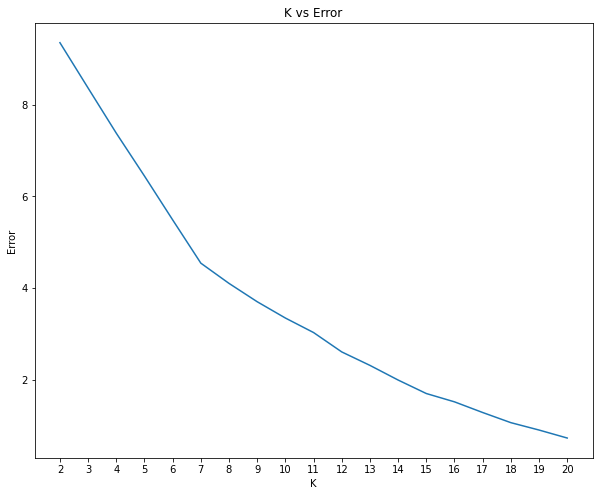

In [59]:
plt.figure(figsize=[10, 8])
sns.lineplot(x=range(2, 21), y=scores)
plt.title("K vs Error")
plt.xticks(range(2, 21))
plt.xlabel("K")
plt.ylabel("Error")

From the elbow method I decided to use K=7

Cluster Neighborhood

In [61]:
#Run k-means to cluster the neighborhood into 7 clusters
kclusters = 7

BC_grouped_clustering = BC_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(BC_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([4, 0, 0, 0, 4, 0, 4, 4, 4, 4], dtype=int32)

In [62]:
#new dataframe that includes the cluster as well as the top 10 venues for each neighborhood
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

BC_merged = df_BC

# merge Boise_grouped with Boise_data to add latitude/longitude for each neighborhood
BC_merged = BC_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood', how= 'right')

BC_merged.head() # check the last columns!

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Northwest,43.682499,-116.295998,1,Park,Wings Joint,Costume Shop,Dessert Shop,Diner,Disc Golf,Discount Store,Dive Bar,Electronics Store,Empanada Restaurant
1,Sunset,43.643799,-116.227997,1,Park,Wings Joint,Costume Shop,Dessert Shop,Diner,Disc Golf,Discount Store,Dive Bar,Electronics Store,Empanada Restaurant
2,North End,43.632000,-116.209000,4,Pizza Place,Plaza,Gift Shop,Bike Shop,Bistro,Massage Studio,Coffee Shop,Farmers Market,Fast Food Restaurant,Dessert Shop
3,West Downtown,43.621899,-116.214996,4,Coffee Shop,Pizza Place,Fast Food Restaurant,Café,Pharmacy,Mediterranean Restaurant,Park,Music Venue,Costume Shop,Diner
4,Downtown Boise,43.613499,-116.209999,4,Hotel,Brewery,Movie Theater,Electronics Store,Coffee Shop,Steakhouse,Gas Station,History Museum,Plaza,Business Service


In [63]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(BC_merged['Latitude'], BC_merged['Longitude'], BC_merged['Neighborhood'], BC_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Examine Clusters

Examine each cluster and determine the venue categories that distinguish each cluster

Cluster 1

In [77]:
BC_merged.loc[BC_merged['Cluster Labels'] == 0, BC_merged.columns[[4] + list(range(5, BC_merged.shape[1]))]]

,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,Pool,Park,Furniture / Home Store,Wings Joint,Fast Food Restaurant,Dance Studio,Dessert Shop,Diner,Disc Golf,Discount Store
8,Park,Electronics Store,Burger Joint,Wings Joint,Fish Market,Dessert Shop,Diner,Disc Golf,Discount Store,Dive Bar
9,Park,Korean Restaurant,Optical Shop,Music Store,Wings Joint,Fast Food Restaurant,Dessert Shop,Diner,Disc Golf,Discount Store
16,Gym,Dive Bar,Shipping Store,Wings Joint,Fish Market,Dance Studio,Dessert Shop,Diner,Disc Golf,Discount Store
30,ATM,Juice Bar,Grocery Store,Park,College Gym,Optical Shop,Salon / Barbershop,Sandwich Place,Shipping Store,Frozen Yogurt Shop
31,Jewelry Store,Park,Wings Joint,Fish Market,Dessert Shop,Diner,Disc Golf,Discount Store,Dive Bar,Electronics Store
35,Convenience Store,Recreation Center,Park,Fast Food Restaurant,Dance Studio,Dessert Shop,Diner,Disc Golf,Discount Store,Dive Bar


Cluster 2

In [78]:
BC_merged.loc[BC_merged['Cluster Labels'] == 1, BC_merged.columns[[4] + list(range(5, BC_merged.shape[1]))]]

,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Park,Wings Joint,Costume Shop,Dessert Shop,Diner,Disc Golf,Discount Store,Dive Bar,Electronics Store,Empanada Restaurant
1,Park,Wings Joint,Costume Shop,Dessert Shop,Diner,Disc Golf,Discount Store,Dive Bar,Electronics Store,Empanada Restaurant
25,Park,Wings Joint,Costume Shop,Dessert Shop,Diner,Disc Golf,Discount Store,Dive Bar,Electronics Store,Empanada Restaurant
29,Park,Wings Joint,Costume Shop,Dessert Shop,Diner,Disc Golf,Discount Store,Dive Bar,Electronics Store,Empanada Restaurant


Cluster 3

In [79]:
BC_merged.loc[BC_merged['Cluster Labels'] == 2, BC_merged.columns[[4] + list(range(5, BC_merged.shape[1]))]]

,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
18,Gym,Wings Joint,Fish Market,Dance Studio,Dessert Shop,Diner,Disc Golf,Discount Store,Dive Bar,Electronics Store


Cluster 4

In [80]:
BC_merged.loc[BC_merged['Cluster Labels'] == 3, BC_merged.columns[[4] + list(range(5, BC_merged.shape[1]))]]

,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
20,Wings Joint,History Museum,Dance Studio,Dessert Shop,Diner,Disc Golf,Discount Store,Dive Bar,Electronics Store,Empanada Restaurant


Cluster 5

In [81]:
BC_merged.loc[BC_merged['Cluster Labels'] == 4, BC_merged.columns[[4] + list(range(5, BC_merged.shape[1]))]]

,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Pizza Place,Plaza,Gift Shop,Bike Shop,Bistro,Massage Studio,Coffee Shop,Farmers Market,Fast Food Restaurant,Dessert Shop
3,Coffee Shop,Pizza Place,Fast Food Restaurant,Café,Pharmacy,Mediterranean Restaurant,Park,Music Venue,Costume Shop,Diner
4,Hotel,Brewery,Movie Theater,Electronics Store,Coffee Shop,Steakhouse,Gas Station,History Museum,Plaza,Business Service
5,Trail,Park,Restaurant,Food,Sandwich Place,Breakfast Spot,Wings Joint,Farmers Market,Dance Studio,Dessert Shop
6,Furniture / Home Store,Gas Station,Farmers Market,Cosmetics Shop,Chinese Restaurant,Food & Drink Shop,Music Store,Sandwich Place,Theater,Print Shop
11,Sporting Goods Shop,Convenience Store,Sandwich Place,Fast Food Restaurant,Costume Shop,Dance Studio,Dessert Shop,Diner,Disc Golf,Discount Store
12,Pizza Place,Hotel,Park,Coffee Shop,Liquor Store,Gas Station,Sushi Restaurant,Photography Studio,Video Store,American Restaurant
13,Sandwich Place,Thrift / Vintage Store,Fast Food Restaurant,Dive Bar,Rental Service,Bowling Alley,Mexican Restaurant,Pub,Chinese Restaurant,Music Store
14,Bakery,Golf Course,Sporting Goods Shop,Wings Joint,Food,Dessert Shop,Diner,Disc Golf,Discount Store,Dive Bar
17,Home Service,Grocery Store,Tree,Ice Cream Shop,Dessert Shop,Farmers Market,Fish Market,Dance Studio,Diner,Disc Golf


Cluster 6

In [82]:
BC_merged.loc[BC_merged['Cluster Labels'] == 5, BC_merged.columns[[4] + list(range(5, BC_merged.shape[1]))]]

,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
28,Home Service,History Museum,Dance Studio,Dessert Shop,Diner,Disc Golf,Discount Store,Dive Bar,Electronics Store,Empanada Restaurant


Cluster 7

In [76]:
BC_merged.loc[BC_merged['Cluster Labels'] == 6, BC_merged.columns[[4] + list(range(5, BC_merged.shape[1]))]]



,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,Recreation Center,Wings Joint,Fish Market,Dance Studio,Dessert Shop,Diner,Disc Golf,Discount Store,Dive Bar,Electronics Store


# Results
Observing the different clusters it seems that there are some overlaps with a few of the themes. For example, cluster 1 and 2 share similar top two venues with "Park". Cluster 2 may have been separated due to numerous locations having the exact same venues at each frequency.

Cluster 5 has numerous venues but does not seem to follow any specific trend. Further analysis of this cluster could provide more insight.


# Discussion
Although the clusters were an interesting process, I do not know how effective they were because of the previously state results. The clusters seem to be more exploratory and would only the first step of many to delve further into the key differences in areas.

# Conclusion
With the help of the clusters and Foursquare data, tourists heading to Boise could effectively create itineraries based on proximity of each cluster. Park lovers would appreciate cluster 1 and 2 which would be the two best areas to get the most bang for their buck. Clustering could be an effective use by tourism bureaus/business planners to maximize the synergy of local businesses and locate areas which may be lacking in certain accomodations.